### Import packages

In [70]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

### Import data

In [71]:
data = pd.read_csv("C:\\Users\\u23e00\\Downloads\\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [72]:
data.shape

(768, 9)

### Data exploration

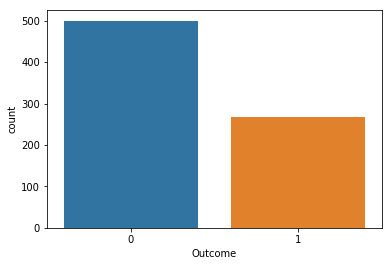

In [73]:
sns.countplot(x="Outcome", data= data)
plt.show()

### Split the dataset

In [74]:
X = data.drop("Outcome", axis = 1)
y = data["Outcome"]

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.2)

### Build Model and prediction

### Model_1
**Random forest without any Hyperparameter Tuning (taking by default hyperparameter)**

In [76]:
from sklearn.ensemble import RandomForestClassifier

model_1 = RandomForestClassifier(random_state=2)
model_1.fit(X_train, y_train)
model_1.score(X_train, y_train)

#Predict Output
y_pred = model_1.predict(X_test)

### Model Evaluation using Confusion Matrix

In [77]:
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
cf_matrix

array([[86, 15],
       [32, 21]], dtype=int64)

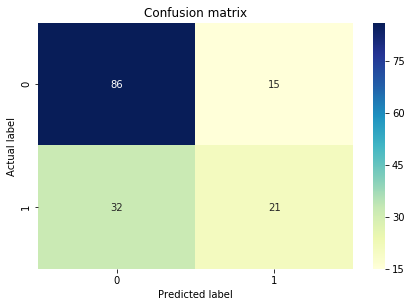

In [78]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()



Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall

In [79]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.6948051948051948
Precision: 0.5833333333333334
Recall: 0.39622641509433965
F1 Score: 0.4719101123595506




**Precision:** Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct.

**Recall:** If there are patients who have diabetes in the test set and your model can identify it 39% of the time.

**F1 score:** A good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms.

### ROC Curve

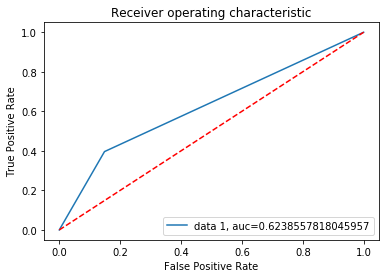

In [80]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

* AUC score for the case is 0.62
* AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

## Model_2


Grid SearchCV

    Looking at the misclassified instances, we can observe that 32 Diabetes cases have been classified incorrectly as Non-Diabetes (False negatives) and 15 as false positive.

    A false negative is more serious as a disease has been ignored, which can lead to the death of the patient. At the same time, a false positive would lead to an unnecessary treatment — incurring additional cost.


In [82]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(oob_score=True,random_state=42)
param_grid = { 
    'n_estimators': [200,300,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring = 'recall')
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [105]:
model_2 = RandomForestClassifier(max_depth=6,oob_score=True,random_state=2,criterion='entropy',max_features='auto',n_estimators=200)
model_2.fit(X_train, y_train)
model_2.score(X_train, y_train)

#Predict Output
y_pred = model_2.predict(X_test)

In [106]:
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
cf_matrix

array([[88, 13],
       [26, 27]], dtype=int64)

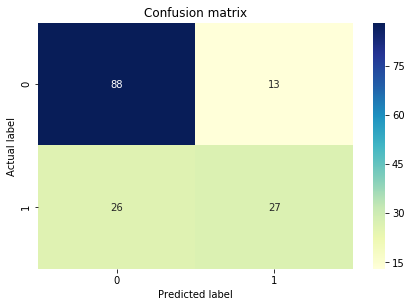

In [108]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [109]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.7467532467532467
Precision: 0.675
Recall: 0.5094339622641509
F1 Score: 0.5806451612903226


**F1 score:** A good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms.

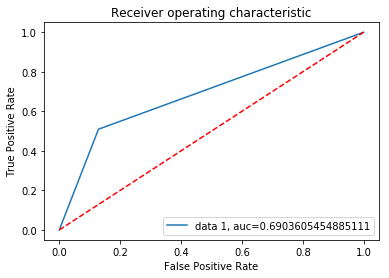

In [110]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [111]:
print("Random forest TRAIN score with ",format(model_2.score(X_train, y_train)))
print("Random forest TEST score with ",format(model_2.score(X_test, y_test)))

Random forest TRAIN score with  0.8925081433224755
Random forest TEST score with  0.7467532467532467


## Feature Engineering

**A general rule in machine learning is that the more features you have, the more likely your model will suffer from overfitting.**


**Feature Importance**

Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature

In [112]:
feature_importances = pd.DataFrame(model_2.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Glucose,0.282144
BMI,0.184985
Age,0.142508
DiabetesPedigreeFunction,0.104378
Pregnancies,0.083510
Insulin,0.069319
BloodPressure,0.067281
SkinThickness,0.065875


## Model_3

### Applying Model after removing less significant attributes

 Top 5 features as  Glucose, BMI, Age, DiabetesPedigreeFunction, Pregnancies.

In [113]:
X_train_f = X_train[["Pregnancies", "Glucose", "Age", "BMI", "DiabetesPedigreeFunction"]]
X_test_f  = X_test[["Pregnancies", "Glucose", "Age", "BMI", "DiabetesPedigreeFunction"]]

model_2.fit(X_train_f, y_train)
model_2.score(X_train_f, y_train)

#Predict Output
y_pred = model_2.predict(X_test_f)

In [114]:
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
cf_matrix

array([[85, 16],
       [22, 31]], dtype=int64)

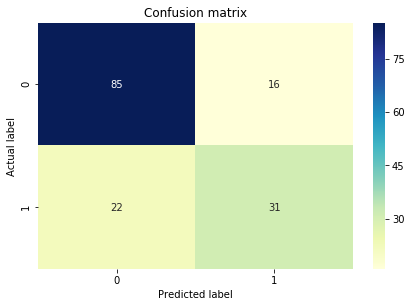

In [115]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [116]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.7532467532467533
Precision: 0.6595744680851063
Recall: 0.5849056603773585
F1 Score: 0.62


**F1 score:** A good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms.

## Comparing the accuracy between  model_1 , model_2, model_3

### Model_1:
* Accuracy: 0.6948051948051948
* Precision: 0.5833333333333334
* Recall: 0.39622641509433965
* F1 Score: 0.4719101123595506


### Model_2:
* Accuracy: 0.7467532467532467
* Precision: 0.675
* Recall: 0.5094339622641509
* F1 Score: 0.5806451612903226

### Model_3:
* Accuracy: 0.7532467532467533
* Precision: 0.6595744680851063
* Recall: 0.5849056603773585
* F1 Score: 0.62


**Model_3 is the best model.**